In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import numba as nb
import pandas_ta 
import os
import datetime
import json
from tabulate import tabulate
import sys
sys.path.append('../..')
import vectorbtpro as vbt
from vectorbtpro.portfolio.enums import SizeType
from src.utils import fu
from src.utils import plot_return_mdd
from src.strategy.BackTester import BackTester
from src.strategy.Analyzer import Analyzer
from src.strategy.MultiTester import MultiTester
from src.utils import plot_return_mdd,twinx_plot # as utils
from kc import get_data,Strategy
# plt.style.use('seaborn')

/Users/johnsonhsiao/opt/anaconda3/lib/python3.9/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)


In [2]:
df_dict = {}
# candidate = ['1INCH','1000SHIB','AAVE','ADA','ALGO','ANKR','APE','APT','ARB','AVAX','BAND','BCH','BLUR','BNB','BTC','CYBER','DOGE','DYDX','EGLD','ENJ','ETC','ETH','FLOW','GALA','GMT','GMX','IMX','IOST','IOTA','LINK','LTC','MATIC','MANA','MKR','NEAR','NEO','OP','SNX','SEI','STX','SUSHI','THETA','TRB','XRP','XMR','XLM']
candidate = ['ETH']#,'ETC','BTC','ETH','BCH','AAVE','AVAX','MATIC','XLM','MKR','APT','EGLD','GRT','ALGO']
for coin in candidate:
    df_dict[coin] = get_data(coin)

In [15]:
df_dict['SOL'] = get_data('SOL')

In [3]:
start = '2022-01-01'
sep = ''
end = ''

# params = {'short_window_l': 20, 'middle_window_l': 58, 'long_window_l': 120, 'short_window_s': 28, 'middle_window_s': 62, 'long_window_s': 120, 'upper_bound': 90}

params = {"window_ma": 24.0,
        "multiplier": 2.0}

side = 'long'
config = {'freq':'1h', 'lag':1, 'fee': 0.0003}
coin = 'ETH'
df = df_dict[coin]
strategy = Strategy(df=df.loc[start:], configs=config)
_pf = strategy.strategy(side = side,params=params)
trades = _pf.trades.records_readable
analyze = Analyzer(strategy)
# analyze.show_period_analysis(trades)
analyze.show_pf_analysis(params, side, coin, axv_index=['2023-05-01'])

KeyError: 'window_ma'

<AxesSubplot:xlabel='Entry Index'>

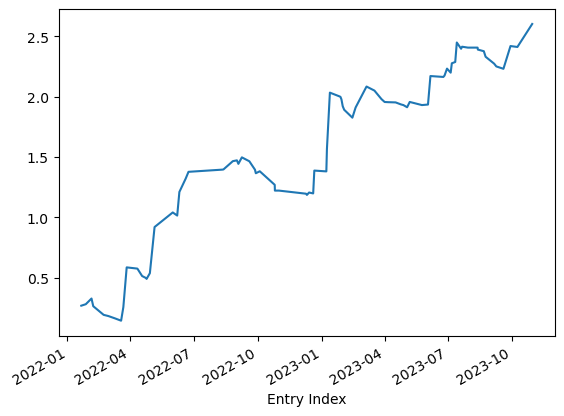

In [25]:
trades.index = trades['Entry Index']
trades['Return'].cumsum().plot()

======================= SOL BOTH Optimize Test =======================
Optimization trails: 150


100%|██████████| 150/150 [00:12<00:00, 11.60it/s]


Optimization time: 12.93 sec
---------- SOL BOTH ----------
{'window_ma': 104, 'multiplier': 4.0}
APY: 200.73 %
MDD: 24.18 %
MDD Duration 105 days 17:00:00
worst trade: -16.10 %
2023-01-25 02:00:00 ~ 2023-01-29 19:00:00
avg holding days: 6.25 days
--------------------------------------------
PF: 2.09
Sharpe Ratio: 2.09
Calmar Ratio: 6.84
Sortino Ratio: 3.14
Omega Ratio: 1.07
--------------------------------------------
Expectancy : 3.50 %
Total Time Exposure : 98.97 %
Total Trades: 77
Win Rate: 44.74 %
--------------------------------------------
PF * Win Rate: 0.933


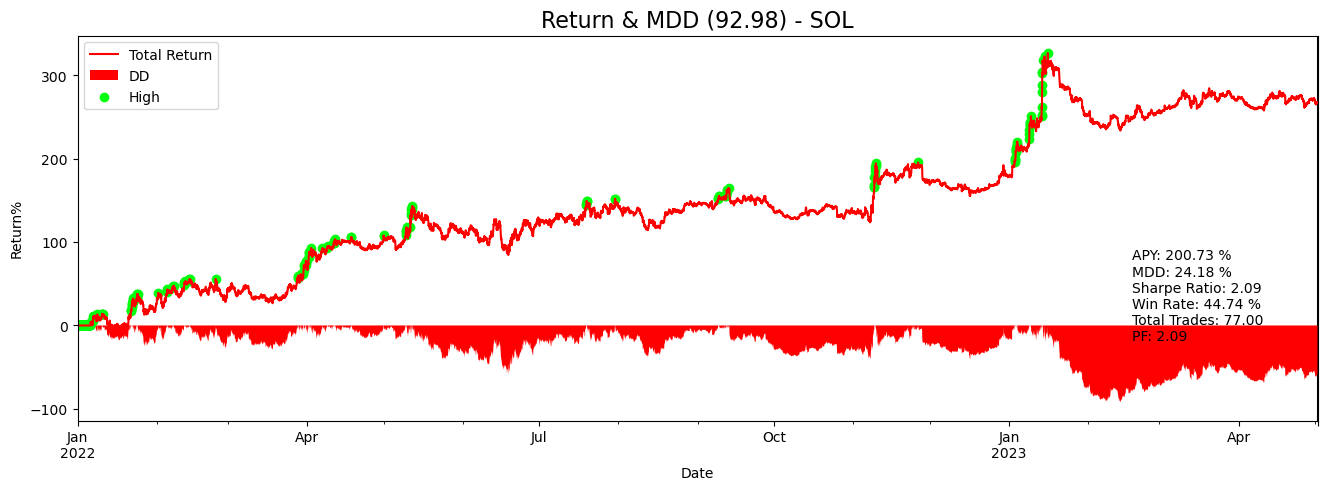

+------------+-----------+----------+----------+------------+---------+------------+
| datetime   |   收益率% |     毛利 |     毛損 |   獲利因子 |   勝率% |   交易次數 |
|------------+-----------+----------+----------+------------+---------+------------|
| 2022-03    |     80.18 | 10630.7  | -2717.02 |       3.91 |   50    |         12 |
| 2022-06    |     41.53 |  9529.17 | -5376.63 |       1.77 |   53.33 |         15 |
| 2022-09    |     15.14 |  5016.08 | -3501.77 |       1.43 |   46.67 |         15 |
| 2022-12    |     43.08 |  8904.77 | -4596.98 |       1.94 |   33.33 |         15 |
| 2023-03    |     89.52 | 15946.8  | -6994.64 |       2.28 |   46.15 |         13 |
| 2023-06    |     -1.69 |  1141.62 | -1310.44 |       0.87 |   42.86 |          7 |
+------------+-----------+----------+----------+------------+---------+------------+


In [4]:
import warnings
warnings.filterwarnings("ignore")

start= '2022-01-01'
end ='2023-05-01'

symbol_list = ['']
sample_sets = [[start,end]]
freq = '1h'

params = {"window_ma": [20,120,4],
          "multiplier":[2, 5 ,0.5]}

config = {'freq':'1h','fee': 0.0003}
multi_test = MultiTester(
    Strategy,
    get_data_func=get_data,
    params=params,
    config=config,
    symbol_list=symbol_list,
    start=start,
    end=end
    )

all_params = multi_test.multi_params(['SOL'],sample_sets,direction='both')
trades, value_df = multi_test.multi_params_result(all_params)
